<a href="https://colab.research.google.com/github/vk-NEU7/Data-Science-tools/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Data Cleaning and Feature Selection**

In this assignment, we will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

# **Abstract**

**Context**

An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

**Link to the Data Set**: [kaggle-dataset](https://https://www.kaggle.com/datasets/prachi13/customer-analytics)

**Content**

The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

**ID**: ID Number of Customers.

**Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

**Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.

**Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.

**Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

**Cost of the product**: Cost of the Product in US Dollars.

**Prior purchases**: The Number of Prior Purchase.

**Product importance**: The company has categorized the product in the various parameter such as low, medium, high.

**Gender**: Male and Female.

**Discount offered**: Discount offered on that specific product.

**Weight in gms**: It is the weight in grams.

**Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

**Summary**: The dataset is consistent, with no missing values or outliers. In this model, we calculated the significance of predictor variables and used a logistic regression model to predict the target variable "Reached on time" and we try to answer each question below.

In [ ]:
#install eli5 dependency for permutation sequence
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=f57f0d7bb2c1d80cf271787c8394b36436ec7fe0f33bc8c94b39bde81596963c
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
# importing required libraries for performing data analysis
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.testing as tm
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (8, 5)

In [ ]:
# Reading the data from the file
data = pd.read_csv('/content/Train.csv')
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


**What are the data types? (Only numeric and categorical)**

In [ ]:
numerical_columns = []
categorical_columns = []
for col in data.columns:
  if data[col].dtype == 'int64':
    numerical_columns.append(col)
  if data[col].dtype == 'object':
    categorical_columns.append(col)

print("Numerical Columns: ", numerical_columns)
print("Categorical Columns: ", categorical_columns)
print("There are", len(numerical_columns), "numerical_Columns")
print("There are", len(categorical_columns), "categorical_columns")

Numerical Columns:  ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
Categorical Columns:  ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
There are 8 numerical_Columns
There are 4 categorical_columns


**Q2: Are there missing values?**

In [ ]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

**Q3: What are the likely distributions of the numeric variables?**

Q-Q Plot, Normality Tests and sns plots on numerical data to plot the distributions of numeric variables

In [ ]:
# Q-Q plot to check how well the numerical column or variable aligns with normal distribution.
from statsmodels.graphics.gofplots import qqplot

<Figure size 300x400 with 0 Axes>

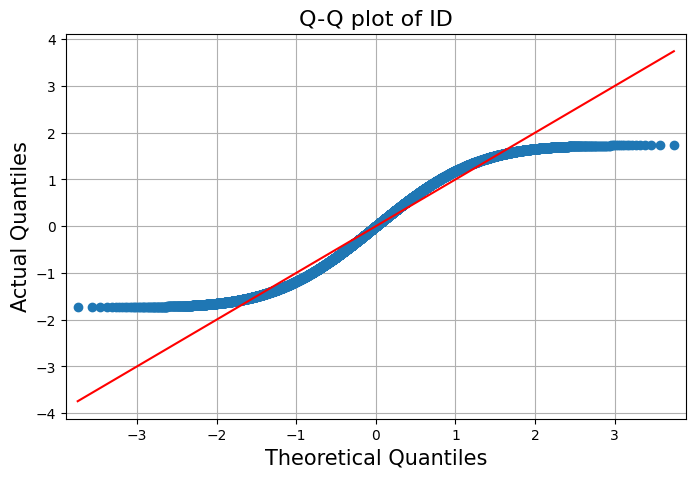

<Figure size 300x400 with 0 Axes>

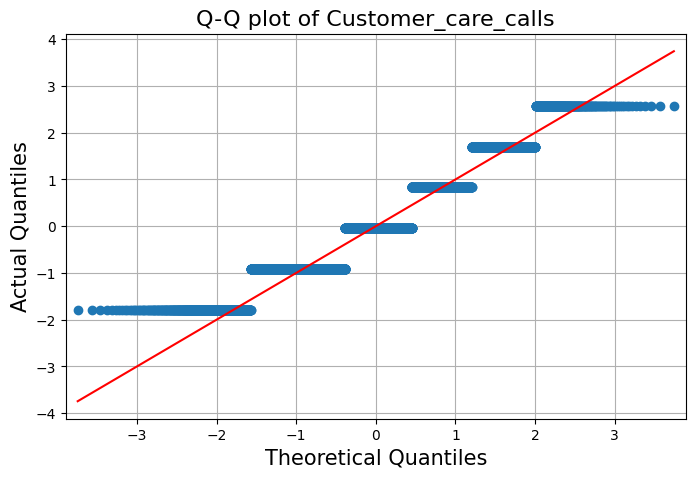

<Figure size 300x400 with 0 Axes>

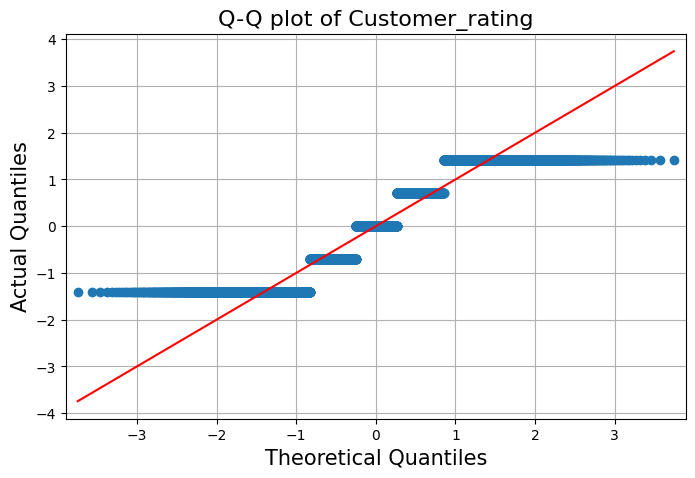

<Figure size 300x400 with 0 Axes>

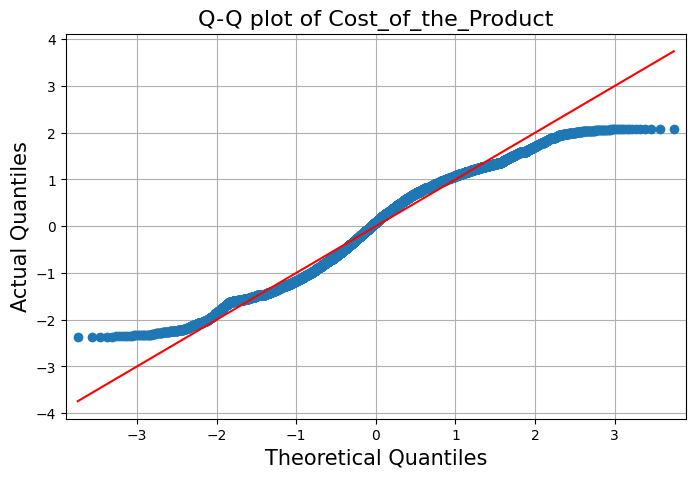

<Figure size 300x400 with 0 Axes>

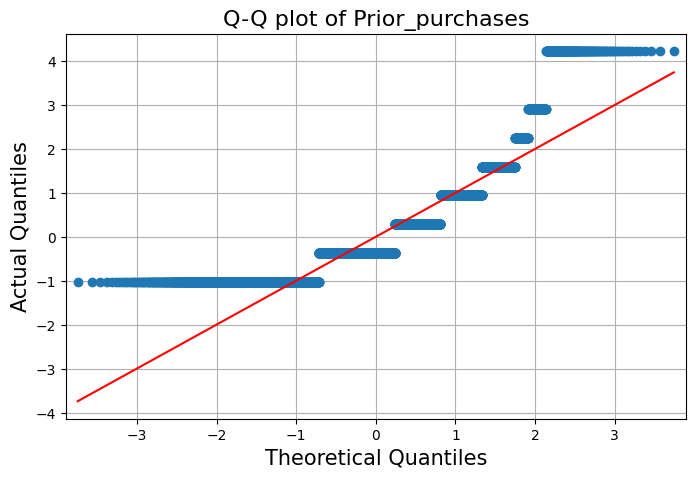

<Figure size 300x400 with 0 Axes>

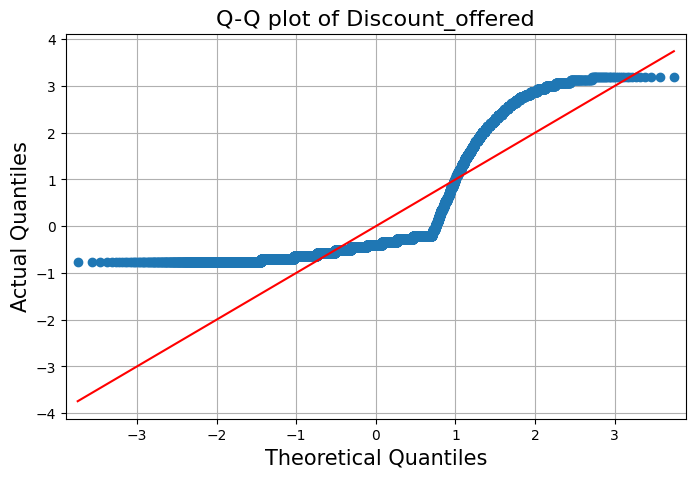

<Figure size 300x400 with 0 Axes>

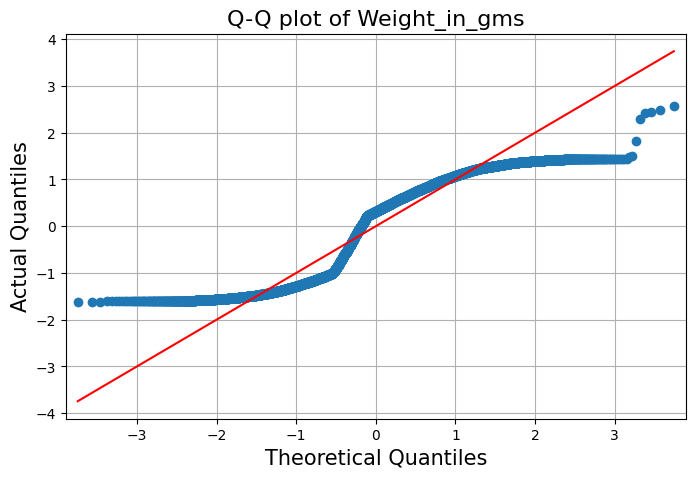

<Figure size 300x400 with 0 Axes>

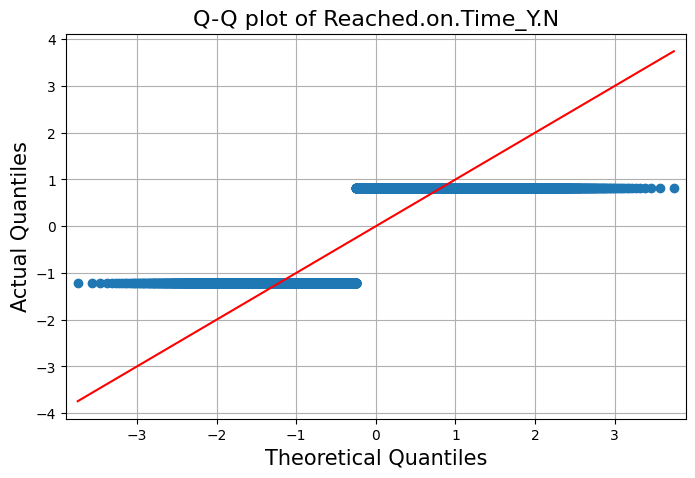

In [ ]:
for col in numerical_columns:
  plt.figure(figsize=(3,4))
  fig = qqplot(data[col], line="s", fit="True")
  plt.xlabel("Theoretical Quantiles", fontsize=15)
  plt.ylabel("Actual Quantiles", fontsize=15)
  plt.title("Q-Q plot of {}". format(col), fontsize=16)
  plt.grid(True)
  plt.show()


SNS plots for statistical visualization

<Axes: xlabel='ID', ylabel='Density'>

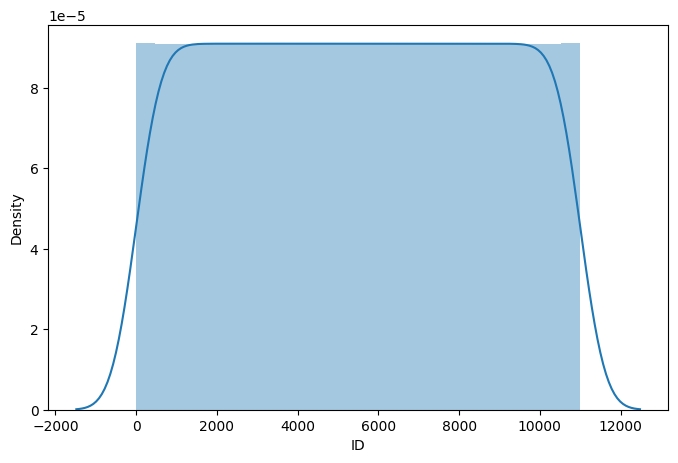

In [ ]:
sns.distplot(data['ID'])

<Axes: xlabel='Customer_care_calls', ylabel='Density'>

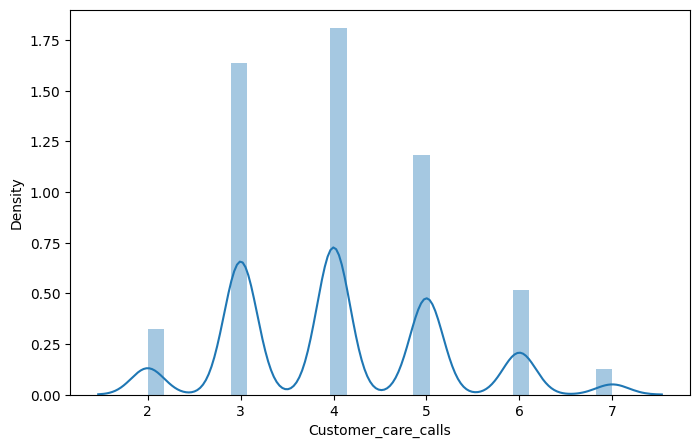

In [ ]:
sns.distplot(data['Customer_care_calls'])

<Axes: xlabel='Customer_rating', ylabel='Density'>

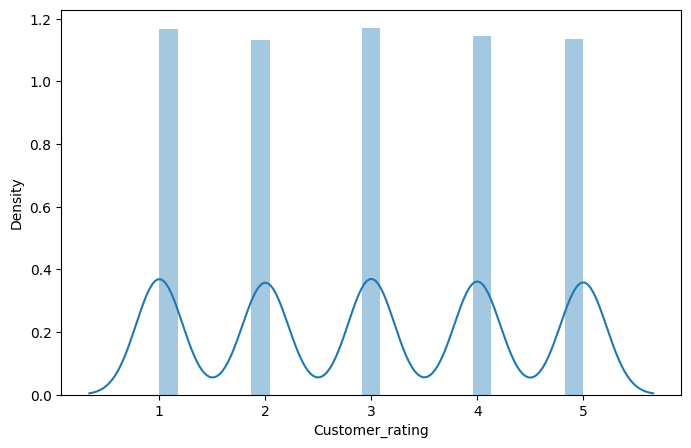

In [ ]:
sns.distplot(data['Customer_rating'])

<Axes: xlabel='Cost_of_the_Product', ylabel='Density'>

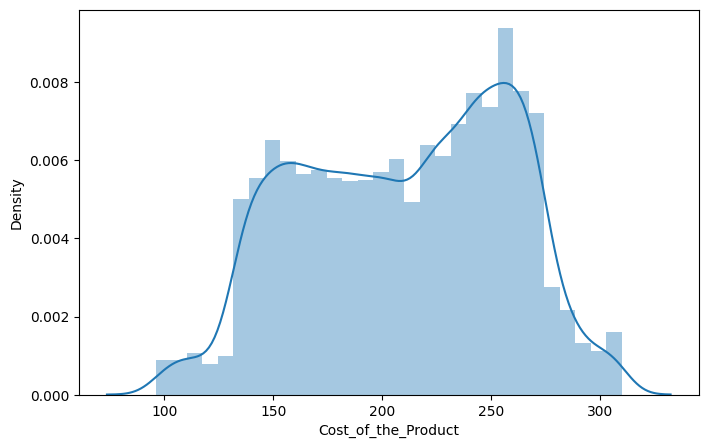

In [ ]:
sns.distplot(data['Cost_of_the_Product'])

<Axes: xlabel='Prior_purchases', ylabel='Density'>

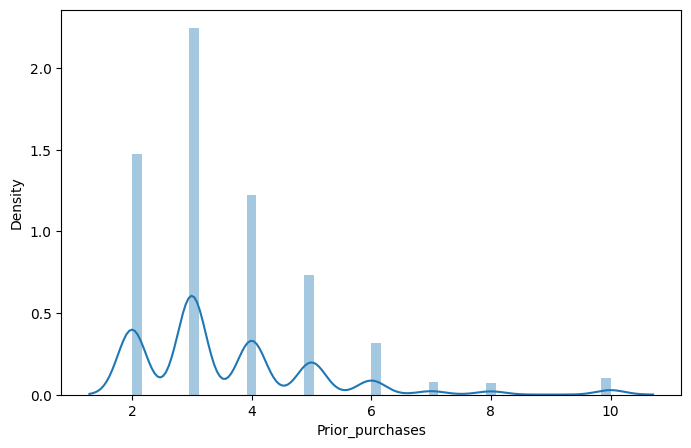

In [ ]:
sns.distplot(data['Prior_purchases'])

<Axes: xlabel='Discount_offered', ylabel='Density'>

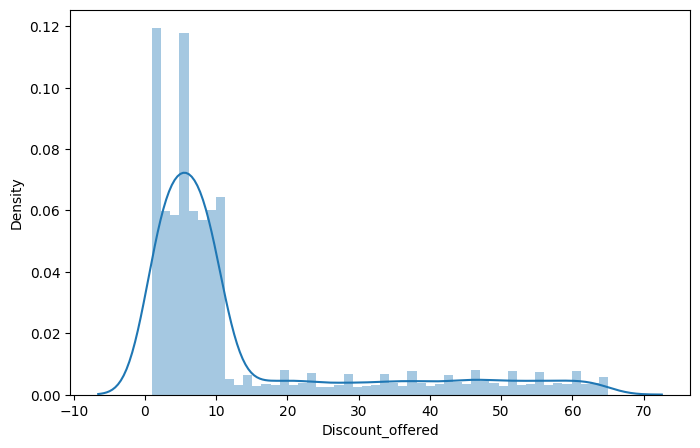

In [ ]:
sns.distplot(data['Discount_offered'])

<Axes: xlabel='Weight_in_gms', ylabel='Density'>

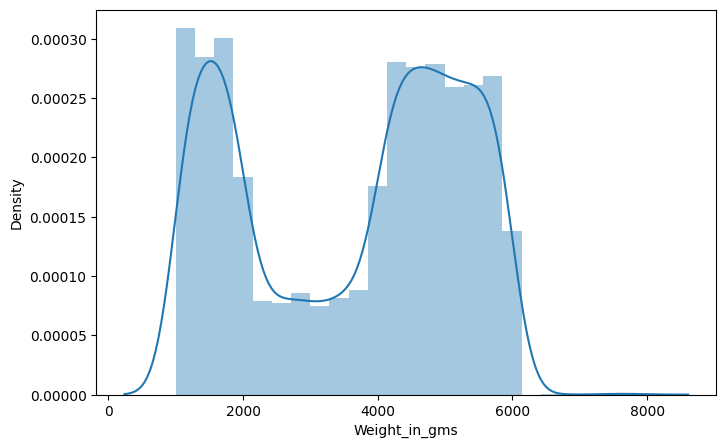

In [ ]:
sns.distplot(data['Weight_in_gms'])

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Density'>

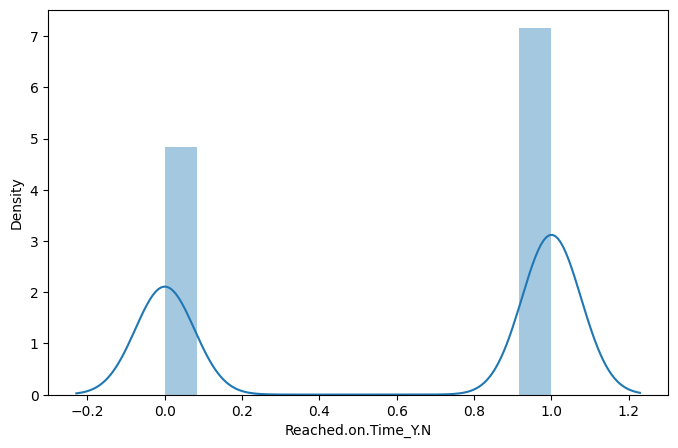

In [ ]:
sns.distplot(data['Reached.on.Time_Y.N'])

In [ ]:
#Anderson-darling tests for normality to verify normality from Q-Q plots
for col in numerical_columns:
  print("Anderson-Darling test for {}".format(col))
  print(stats.anderson(data[col], dist='norm'))


Anderson-Darling test for ID
AndersonResult(statistic=122.26710413957699, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5500.0, scale=3175.282139695096)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Anderson-Darling test for Customer_care_calls
AndersonResult(statistic=392.3605288329545, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=4.054459496317847, scale=1.141489647105304)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Anderson-Darling test for Customer_rating
AndersonResult(statistic=393.2367465937041, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=2.9905445949631786, scale=1.41360317132329

Q3 answer:

Based on the Anderson-Darling test, we see that the statistic is exceeding the critical_values for each column hence it rejects null hypothesis of normal distributions.

The QQ plot and sns plots indicate the 'Cost_of_product' roughly follows normal distribution.

The QQ plot and sns plots indicate ID, 'Weight_in_gms' and 'Reached.on.Time_Y.N' follows uniform distribution.

The QQ plot and sns plots indicate the 'Discount_offered' column roughly follows pastero distribution.

The distribution of 'Customer_care_calls', 'Customer_rating', 'Prior_purchases' indicate no definite distribution pattern.

**Q4: Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

The three methods used here to filter independent variables for better model are correlation matrix(pairplot), Logit Regression Results from statsmodel, Permutation Importance.

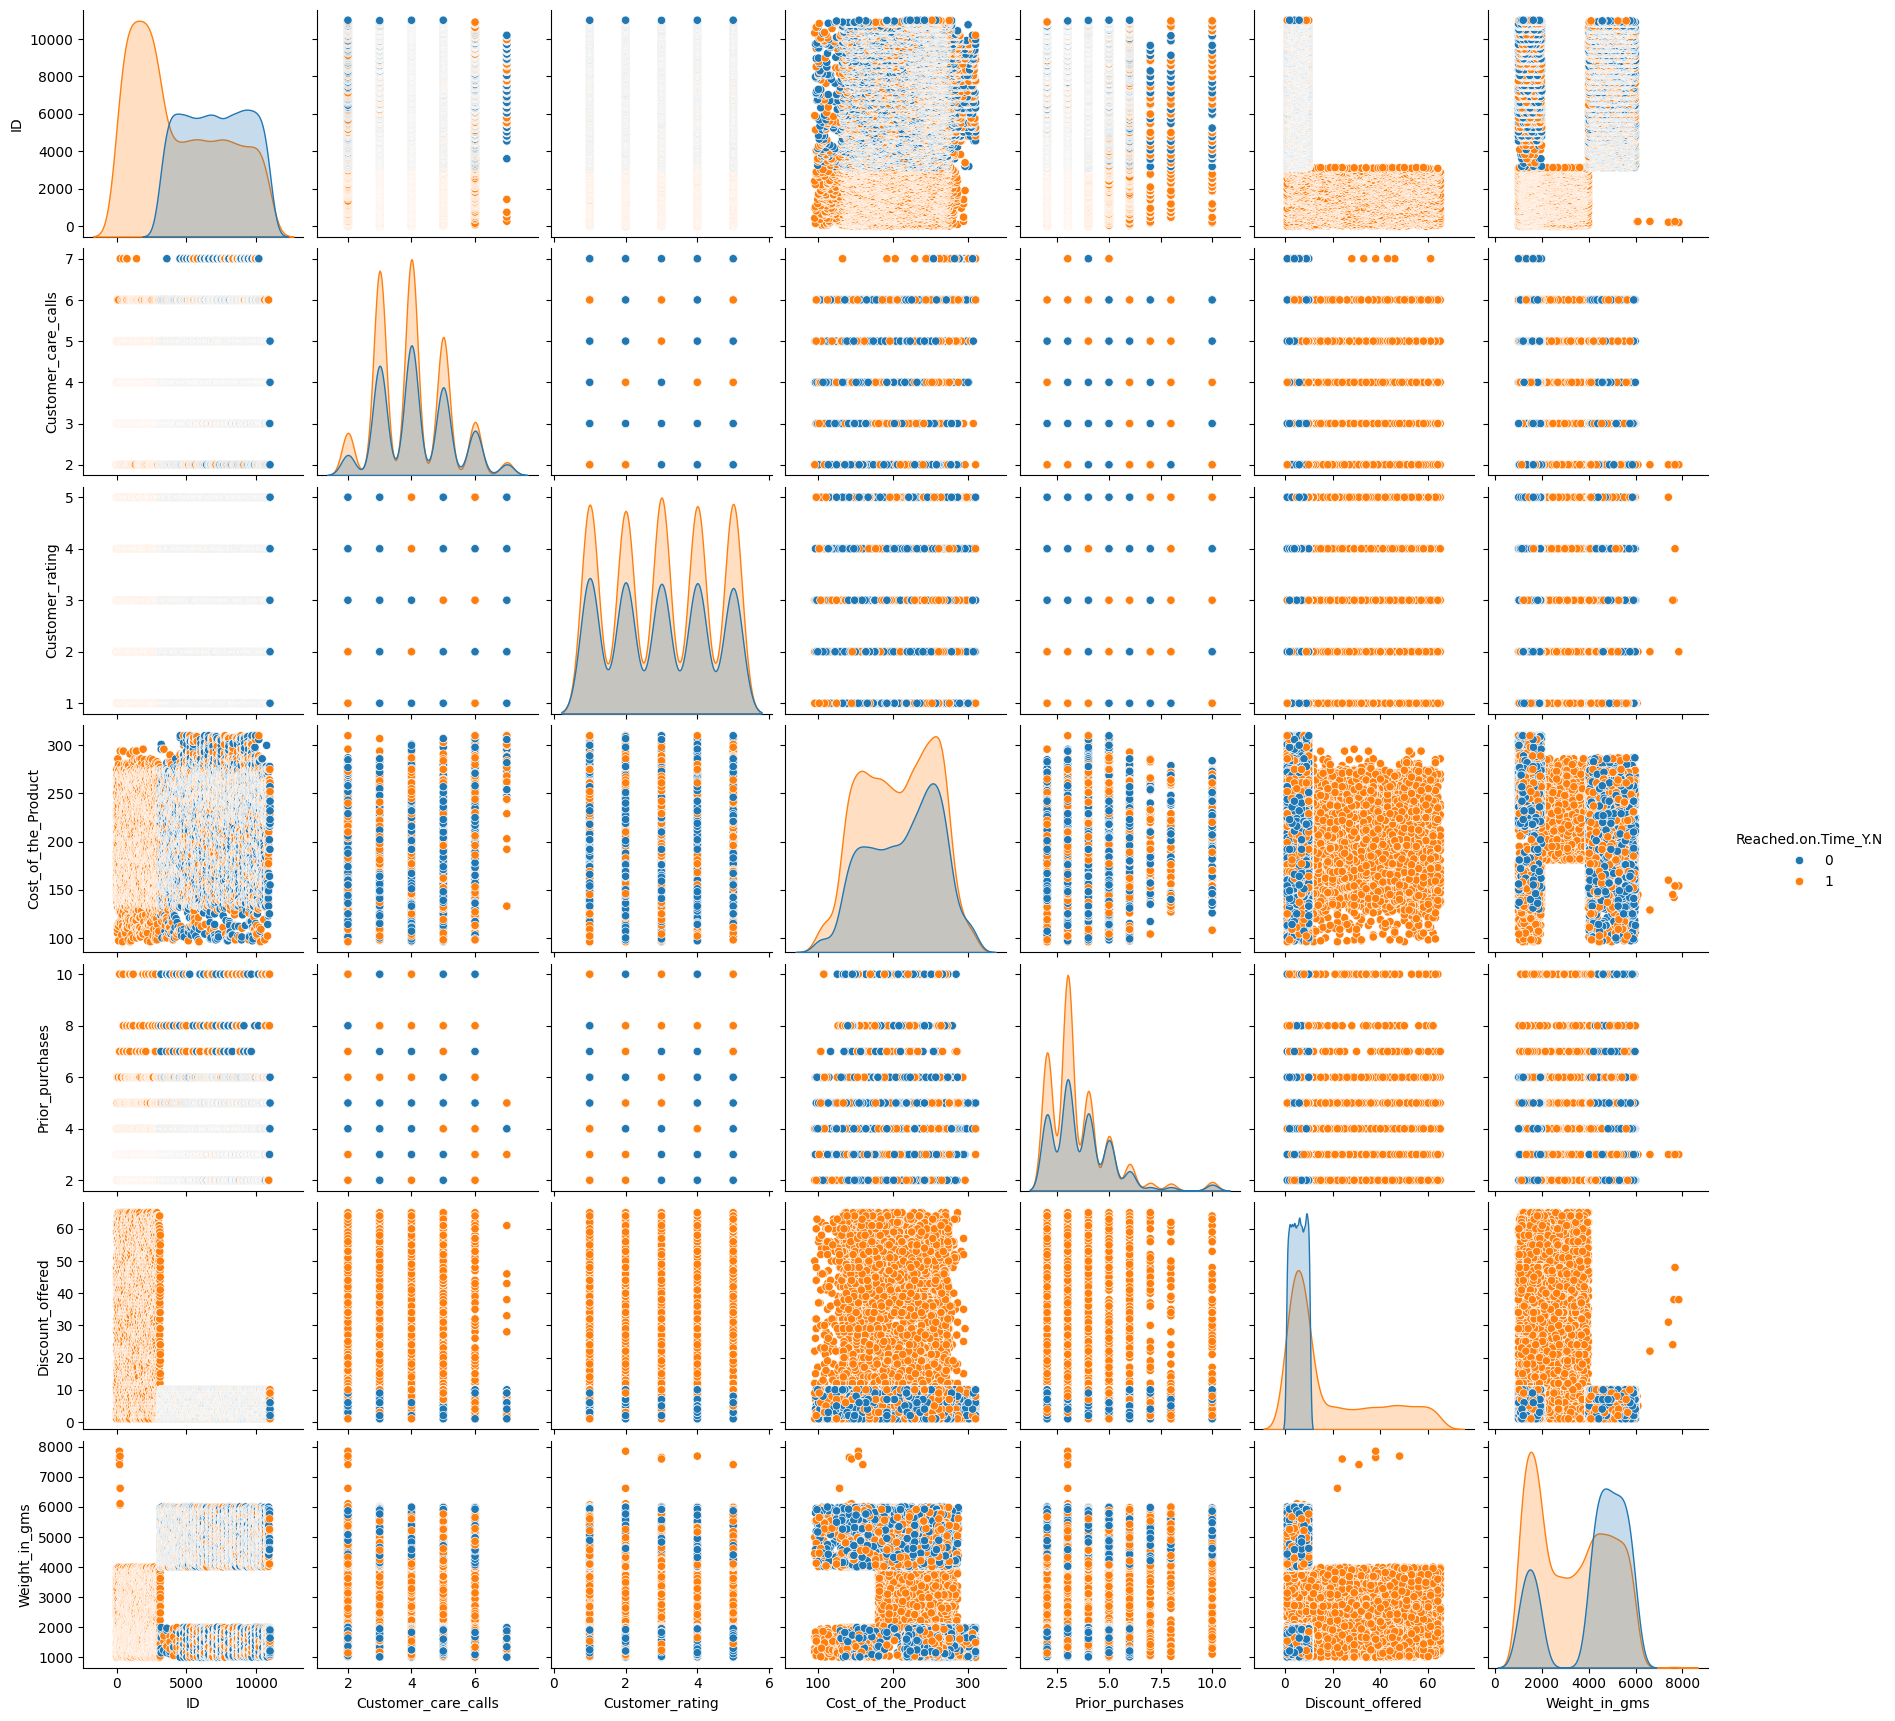

In [ ]:
sns.pairplot(data, hue="Reached.on.Time_Y.N")

Based on the pairplot analysis, it is evident that plots like "discount_offered vs cost_of_product" and "cost_of_product vs weight_in_grams" provide sufficient evidence to categorize whether the product reached on time. There appears to be a linear relationship in these plots.

As a result, we intend to enhance our predictive model by incorporating dummy variables into the categorical_columns, thus introducing additional predictors.

In [ ]:
# dropping ID column as it is just unique value representing data.
data = data.drop("ID", 1)

In [ ]:
#adding dummy data to categorical_columns to include additional predictor varibles
data = pd.get_dummies(data)
data

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,4,1,232,5,6,1247,0,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,5,4,242,5,4,1155,0,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,5,2,223,6,2,1210,0,0,0,0,0,1,0,0,1,0,0,1,0,1


In [ ]:
import statsmodels.api as sm

model = sm.Logit(
    data["Reached.on.Time_Y.N"],
    data[
        [
            "Customer_care_calls",
            "Customer_rating",
            "Cost_of_the_Product",
            "Prior_purchases",
            "Discount_offered",
            "Weight_in_gms",
            "Mode_of_Shipment_Flight",
            "Mode_of_Shipment_Road",
            "Mode_of_Shipment_Ship",
            "Warehouse_block_A",
            "Warehouse_block_B",
            "Warehouse_block_C",
            "Warehouse_block_D",
            "Warehouse_block_F",
            "Product_importance_high",
            "Product_importance_low",
            "Product_importance_medium",
            "Gender_F",
            "Gender_M",
        ]
    ],
).fit()

model.summary()

         Current function value: 0.545802
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Reached.on.Time_Y.N   No. Observations:                10999
Model:                           Logit   Df Residuals:                    10983
Method:                            MLE   Df Model:                           15
Date:                 Mon, 29 Jan 2024   Pseudo R-squ.:                  0.1906
Time:                         17:56:06   Log-Likelihood:                -6003.3
converged:                       False   LL-Null:                       -7417.0
Covariance Type:             nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Customer_care_calls          -0.1071      0.022     -4.979      0.000      -0.149      -0.065
Customer_rating               0.0248      0.015      1.605      0.108      -0.005       0.055
Cost_of_the_Product          -0.0020      0.001     -3.955      0.000      -0.003      -0.001
Prior_purchases              -0.0771      0.015     -5.082      0.000      -0.107      -0.047
Discount_offered              0.1118      0.004     25.087      0.000       0.103       0.121
Weight_in_gms                -0.0002   1.61e-05    -14.875      0.000      -0.000      -0.000
Mode_of_Shipment_Flight       0.3731        nan        nan        nan         nan         nan
Mode_of_Shipment_Road         0.3385        nan        nan        nan         nan         nan
Mode_of_Shipment_Ship         0.3529        nan        nan        nan         nan         nan
Warehouse_block_A             0.1647   2.63e+06   6.27e-08      1.000   -5.15e+06    5.15e+06
Warehouse_block_B             0.2445   2.63e+06    9.3e-08      1.000   -5.15e+06    5.15e+06
Warehouse_block_C             0.2189   2.64e+06    8.3e-08      1.000   -5.17e+06    5.17e+06
Warehouse_block_D             0.2257   2.63e+06   8.57e-08      1.000   -5.16e+06    5.16e+06
Warehouse_block_F             0.2106   2.61e+06   8.06e-08      1.000   -5.12e+06    5.12e+06
Product_importance_high       0.5800   1.87e+06   3.11e-07      1.000   -3.66e+06    3.66e+06
Product_importance_low        0.2373   1.87e+06   1.27e-07      1.000   -3.66e+06    3.66e+06
Product_importance_medium     0.2471   1.95e+06   1.27e-07      1.000   -3.81e+06    3.81e+06
Gender_F                      0.5067    1.1e+06    4.6e-07      1.000   -2.16e+06    2.16e+06
Gender_M                      0.5577    1.1e+06   5.06e-07      1.000   -2.16e+06    2.16e+06
=============================================================================================
"""

The model results may become confused due to the presence of multiple dummy variables for the same category, such as both 'Gender_M' and 'Gender_F'. Therefore, we can exclude one variable from our predictors and perform analysis again.

In [ ]:
import statsmodels.api as sm

model = sm.Logit(
    data["Reached.on.Time_Y.N"],
    data[
        [
            "Customer_care_calls",
            "Customer_rating",
            "Cost_of_the_Product",
            "Prior_purchases",
            "Discount_offered",
            "Weight_in_gms",
            "Warehouse_block_A",
            "Warehouse_block_B",
            "Warehouse_block_C",
            "Warehouse_block_D",
            "Mode_of_Shipment_Flight",
            "Mode_of_Shipment_Road",
            "Product_importance_high",
            "Product_importance_low",
            "Gender_F",
        ]
    ],
).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.548155
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Reached.on.Time_Y.N   No. Observations:                10999
Model:                           Logit   Df Residuals:                    10984
Method:                            MLE   Df Model:                           14
Date:                 Mon, 29 Jan 2024   Pseudo R-squ.:                  0.1871
Time:                         17:42:11   Log-Likelihood:                -6029.2
converged:                        True   LL-Null:                       -7417.0
Covariance Type:             nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Customer_care_calls        -0.0406      0.019     -2.100      0.036      -0.078      -0.003
Customer_rating             0.0512      0.015      3.416      0.001       0.022       0.081
Cost_of_the_Product        -0.0001      0.000     -0.239      0.811      -0.001       0.001
Prior_purchases            -0.0428      0.014     -3.001      0.003      -0.071      -0.015
Discount_offered            0.1217      0.004     27.925      0.000       0.113       0.130
Weight_in_gms              -0.0002   1.15e-05    -13.957      0.000      -0.000      -0.000
Warehouse_block_A           0.0172      0.065      0.267      0.789      -0.109       0.144
Warehouse_block_B           0.0887      0.065      1.367      0.172      -0.038       0.216
Warehouse_block_C           0.0637      0.065      0.981      0.326      -0.063       0.191
Warehouse_block_D           0.0740      0.065      1.145      0.252      -0.053       0.201
Mode_of_Shipment_Flight     0.0470      0.060      0.785      0.433      -0.070       0.165
Mode_of_Shipment_Road       0.0085      0.060      0.141      0.888      -0.110       0.127
Product_importance_high     0.3543      0.083      4.244      0.000       0.191       0.518
Product_importance_low      0.0391      0.045      0.867      0.386      -0.049       0.128
Gender_F                   -0.0110      0.043     -0.256      0.798      -0.096       0.074
===========================================================================================
"""

It can be concluded from the Logistic Regression results that the p-values of predictors, including 'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', and 'Product_importance_high', are < 0.05. Therefore, these predictors are considered more significant. We will include only these variables in our training and testing data when performing logistic regression.

In [ ]:
data_significant = data[['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Product_importance_high']]
data_significant

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_high
0,4,2,3,44,1233,0
1,4,5,2,59,3088,0
2,2,2,4,48,3374,0
3,3,3,4,10,1177,0
4,2,2,3,46,2484,0
...,...,...,...,...,...,...
10994,4,1,5,1,1538,0
10995,4,1,5,6,1247,0
10996,5,4,5,4,1155,0
10997,5,2,6,2,1210,0


The predictors cost_of_product, all the warehouse blocks, modes_of_shipment, low product importance and gender are insignificat hence we can exclude them

**Q5: Which independent variables have missing data? How much?**

There is no missing data in independent variables.

**Q7: In the predictor variables independent of all the other predictor variables?**


In [ ]:
data.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126,-0.006375,-0.013428,0.004099,-0.000401,0.012732,0.019093,0.003292,-0.017629,-0.048995,0.047111,-0.019761,-0.002545,0.002545
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119,-0.010471,-0.003222,0.001093,0.008687,0.003092,-0.002481,0.001516,0.000765,0.000679,-0.004752,0.004408,-0.002775,0.002775
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587,-0.013299,0.018260,0.009255,0.006618,-0.016472,-0.008130,0.002531,0.004419,-0.040421,0.037361,-0.014785,-0.019759,0.019759
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515,0.002979,0.002178,-0.003750,0.010095,-0.009095,-0.000263,0.003913,-0.002864,0.018066,-0.024921,0.014902,0.009395,-0.009395
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108,-0.004157,-0.005135,0.000736,-0.007714,0.012864,-0.005750,-0.007787,0.010643,0.024514,-0.019638,0.005920,0.011777,-0.011777
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793,-0.005078,0.000461,0.002000,-0.001414,0.003187,-0.001245,0.004146,-0.002273,0.069775,-0.080468,0.041634,-0.003573,0.003573
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000,-0.009317,0.005106,0.000132,0.000830,0.002568,0.004371,-0.007671,0.002577,0.033242,-0.007667,-0.011099,-0.004689,0.004689
Warehouse_block_A,-0.006375,-0.010471,-0.013299,0.002979,-0.004157,-0.005078,-0.009317,1.000000,-0.199978,-0.199978,-0.200044,-0.316189,0.000570,0.000461,-0.000811,0.006098,0.012815,-0.016380,0.001911,-0.001911
Warehouse_block_B,-0.013428,-0.003222,0.018260,0.002178,-0.005135,0.000461,0.005106,-0.199978,1.000000,-0.199978,-0.200044,-0.316189,-0.000093,0.000461,-0.000289,-0.010419,-0.013551,0.019570,-0.007847,0.007847
Warehouse_block_C,0.004099,0.001093,0.009255,-0.003750,0.000736,0.002000,0.000132,-0.199978,-0.199978,1.000000,-0.200044,-0.316189,-0.000755,0.000461,0.000233,0.008706,-0.004274,-0.000621,-0.001504,0.001504


<Axes: >

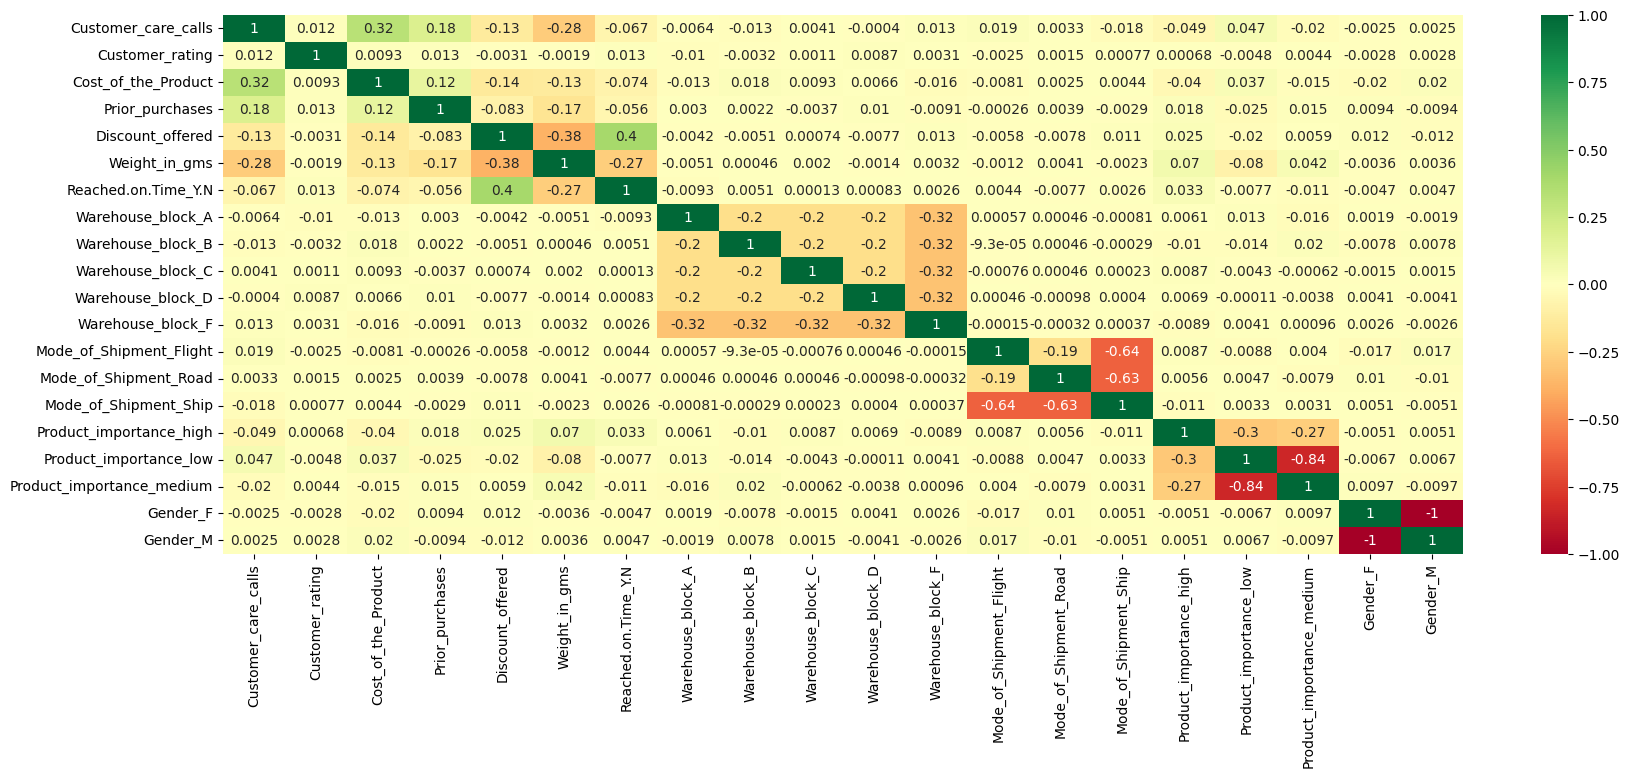

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

We can observe from the correlation heatmap that there are no higher correlation coefficients between independent variables, indicating no dependency among them.

**Q9: Do the ranges of the predictor variables make sense?**

Below is the box plot to visualize the distribution and range of the outliers. We can observe there aren't many outliers to significantly impact the accuracy of the model.

<Axes: >

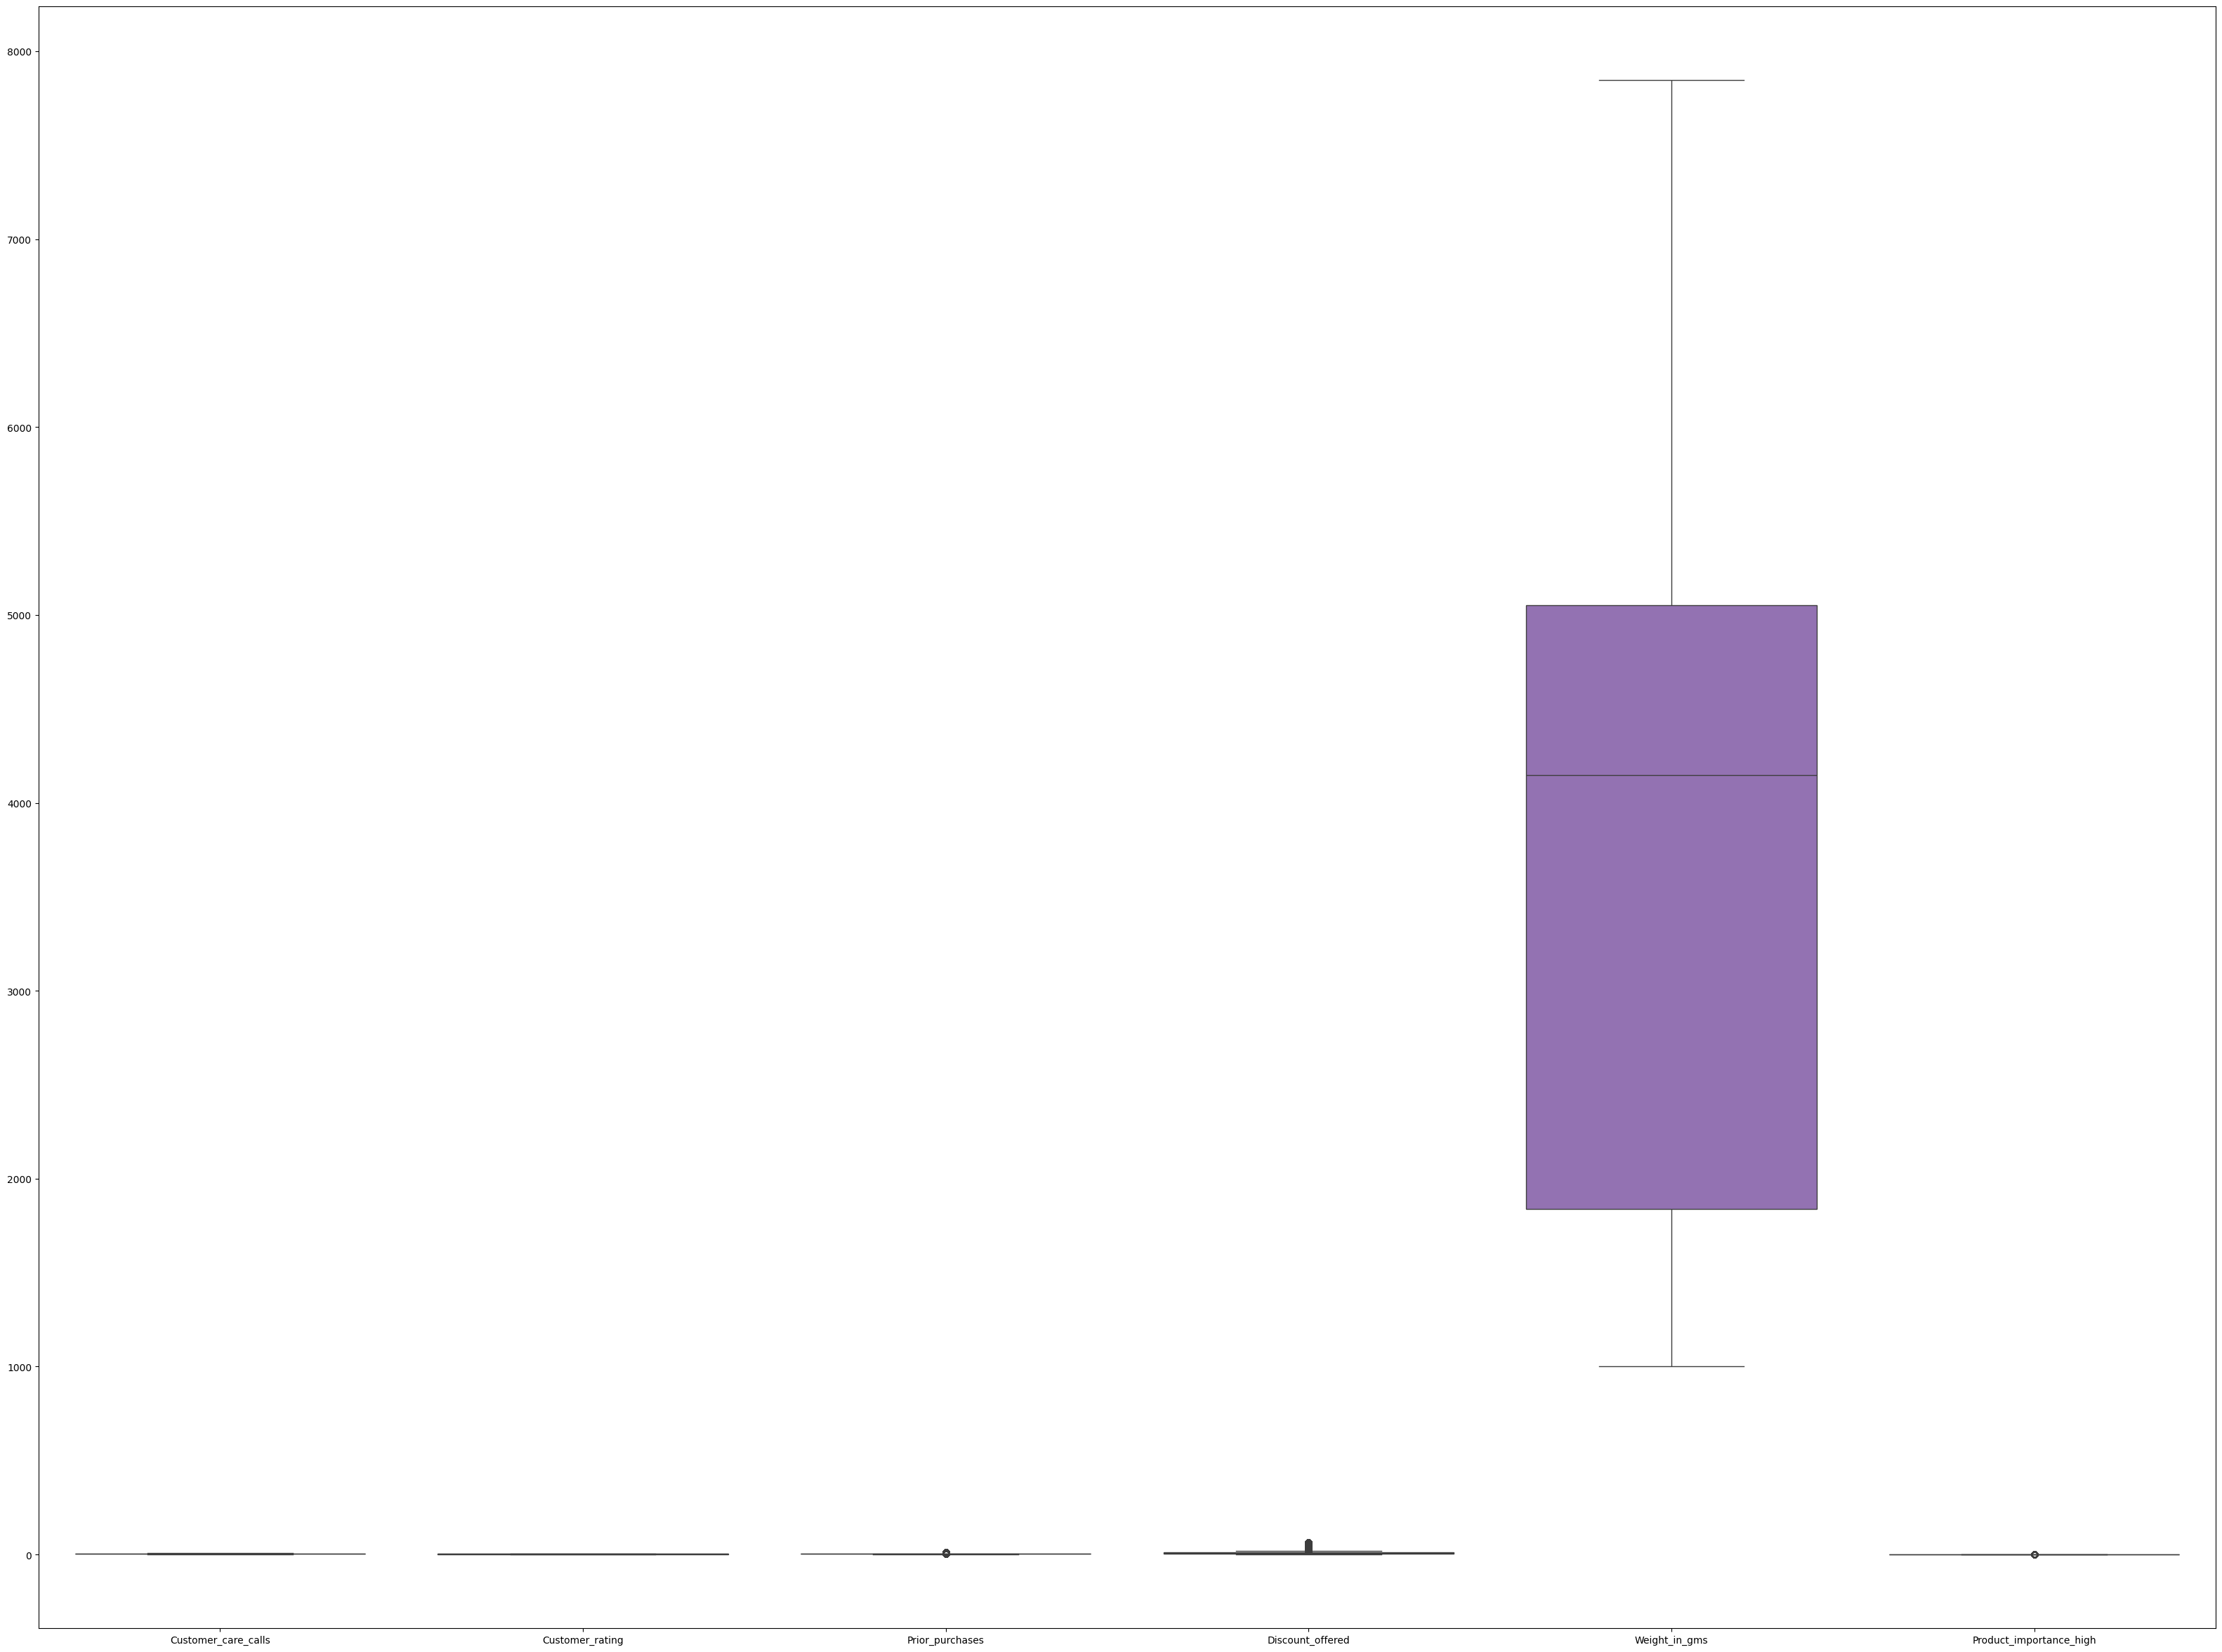

In [ ]:
plt.figure(figsize=(40,30))
sns.boxplot(data_significant)

**Q10: What are the distributions of the predictor variables?**

Q-Q plots and sns plots

<Figure size 300x400 with 0 Axes>

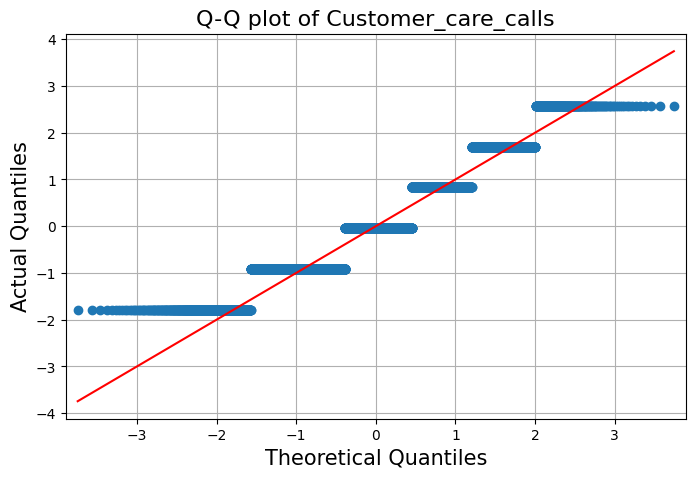

<Figure size 300x400 with 0 Axes>

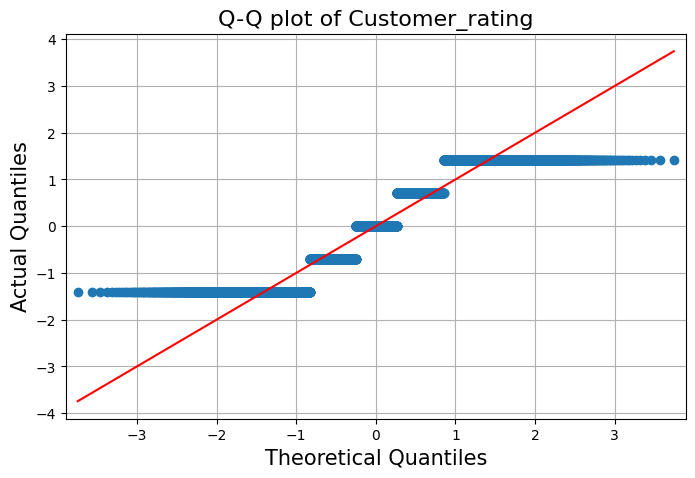

<Figure size 300x400 with 0 Axes>

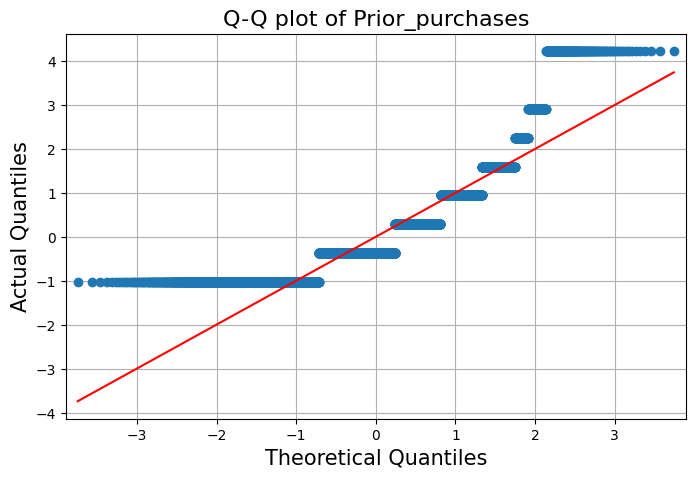

<Figure size 300x400 with 0 Axes>

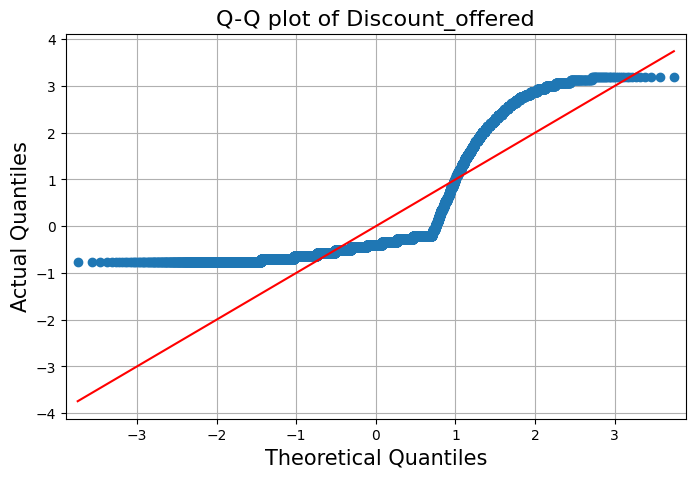

<Figure size 300x400 with 0 Axes>

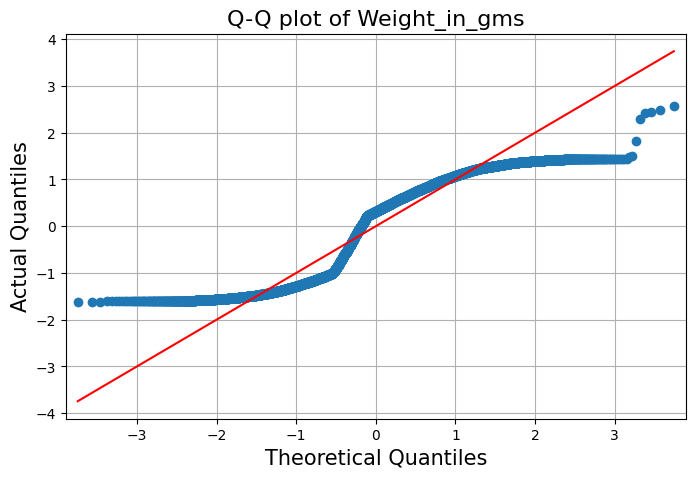

<Figure size 300x400 with 0 Axes>

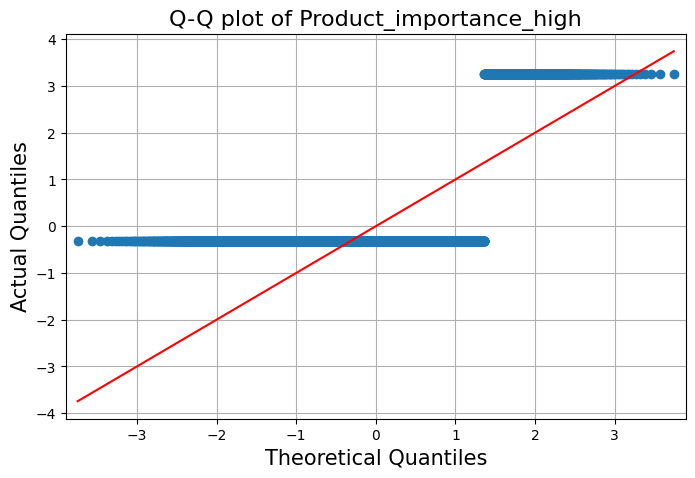

In [ ]:
for col in data_significant:
  plt.figure(figsize=(3,4))
  fig = qqplot(data[col], line="s", fit="True")
  plt.xlabel("Theoretical Quantiles", fontsize=15)
  plt.ylabel("Actual Quantiles", fontsize=15)
  plt.title("Q-Q plot of {}". format(col), fontsize=16)
  plt.grid(True)
  plt.show()

The 'Weight in grams' roughly follows normal distribution

<Axes: xlabel='Customer_care_calls', ylabel='Density'>

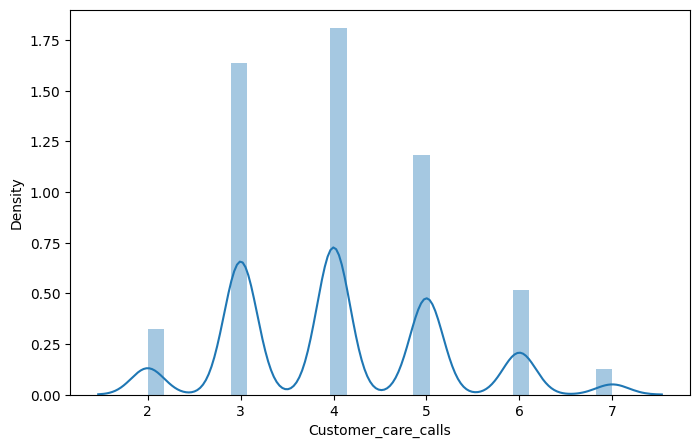

In [ ]:
sns.distplot(data_significant['Customer_care_calls'])

<Axes: xlabel='Customer_rating', ylabel='Density'>

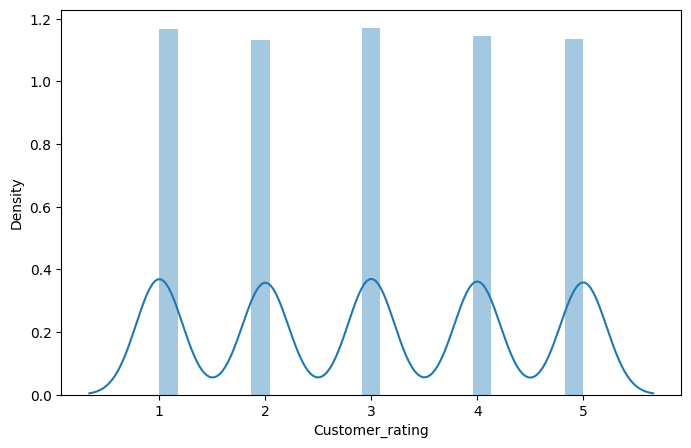

In [ ]:
sns.distplot(data_significant['Customer_rating'])

<Axes: xlabel='Prior_purchases', ylabel='Density'>

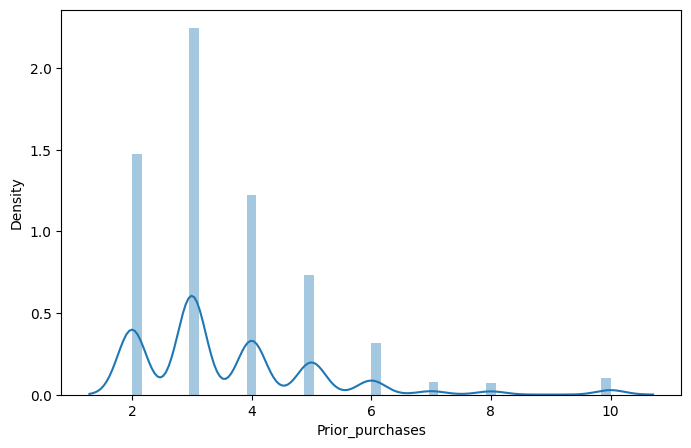

In [ ]:
sns.distplot(data_significant['Prior_purchases'])

<Axes: xlabel='Discount_offered', ylabel='Density'>

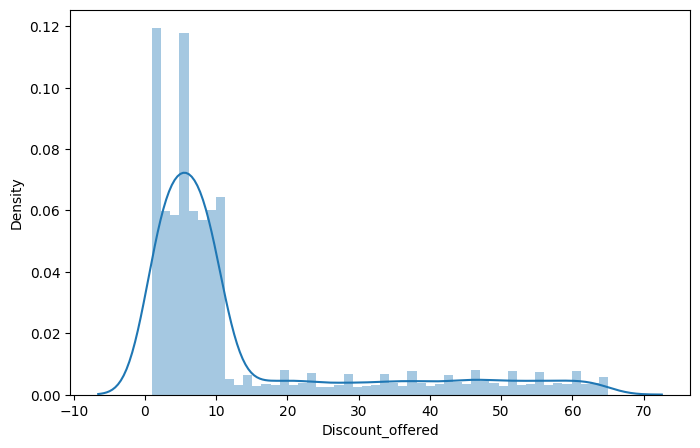

In [ ]:
sns.distplot(data_significant['Discount_offered'])

<Axes: xlabel='Weight_in_gms', ylabel='Density'>

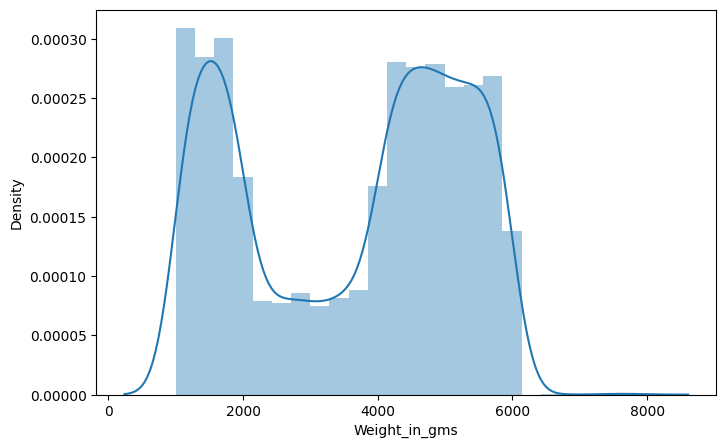

In [ ]:
sns.distplot(data_significant['Weight_in_gms'])

<Axes: xlabel='Product_importance_high', ylabel='Density'>

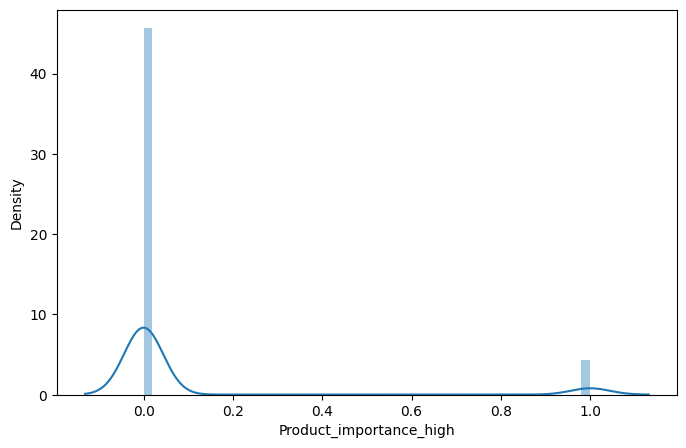

In [ ]:
sns.distplot(data_significant['Product_importance_high'])

In [ ]:
import statsmodels.api as sm

model = sm.Logit(
    data["Reached.on.Time_Y.N"],
    data_significant,
).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.548349
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Reached.on.Time_Y.N   No. Observations:                10999
Model:                           Logit   Df Residuals:                    10993
Method:                            MLE   Df Model:                            5
Date:                 Mon, 29 Jan 2024   Pseudo R-squ.:                  0.1868
Time:                         18:43:21   Log-Likelihood:                -6031.3
converged:                        True   LL-Null:                       -7417.0
Covariance Type:             nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Customer_care_calls        -0.0367      0.015     -2.497      0.013      -0.065      -0.008
Customer_rating             0.0527      0.015      3.575      0.000       0.024       0.082
Prior_purchases            -0.0413      0.014     -3.012      0.003      -0.068      -0.014
Discount_offered            0.1222      0.004     28.346      0.000       0.114       0.131
Weight_in_gms              -0.0002   1.07e-05    -14.647      0.000      -0.000      -0.000
Product_importance_high     0.3364      0.080      4.196      0.000       0.179       0.494
===========================================================================================
"""

In [ ]:
# performing logistic regression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y = data['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(data_significant, y, test_size=.3, random_state=1)
X_train.head()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_high
4177,4,5,3,9,4953,0
1616,3,4,3,63,1611,0
2775,4,1,3,19,1906,0
10272,4,4,3,5,4440,0
6836,4,3,3,1,5214,1


In [ ]:
lr = LogisticRegression(C=1e9)
LRm = lr.fit(X_train, y_train)
LRm.predict_proba(X_test)

array([[0.68985371, 0.31014629],
       [0.01290386, 0.98709614],
       [0.56361364, 0.43638636],
       ...,
       [0.33349764, 0.66650236],
       [0.61349119, 0.38650881],
       [0.57988324, 0.42011676]])

In [ ]:
y_pred = LRm.predict(X_test)
print(y_pred)
print("Accuracy of the model is:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

[0 1 0 ... 1 0 0]
Accuracy of the model is: 0.6357575757575757
Confusion Matrix:


array([[ 765,  577],
       [ 625, 1333]])

**Q11: Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

From box plots we can observe that there no significant outliers in the dataset. We add outliers to the independent variables and observe the effect on the model using methods.

In [ ]:
data_significant.mean()

Customer_care_calls           4.054459
Customer_rating               2.990545
Prior_purchases               3.567597
Discount_offered             13.373216
Weight_in_gms              3634.016729
Product_importance_high       0.086190
dtype: float64

In [ ]:
import copy

In [ ]:
deep_copy_significant_data = copy.deepcopy(data_significant)
for col in deep_copy_significant_data:
  colMean = data_significant[col].mean()
  outliers = pd.Series(np.random.uniform(colMean/10, 10*colMean, size=5))
  deep_copy_significant_data.loc[100:104, col] += outliers.values

<Axes: >

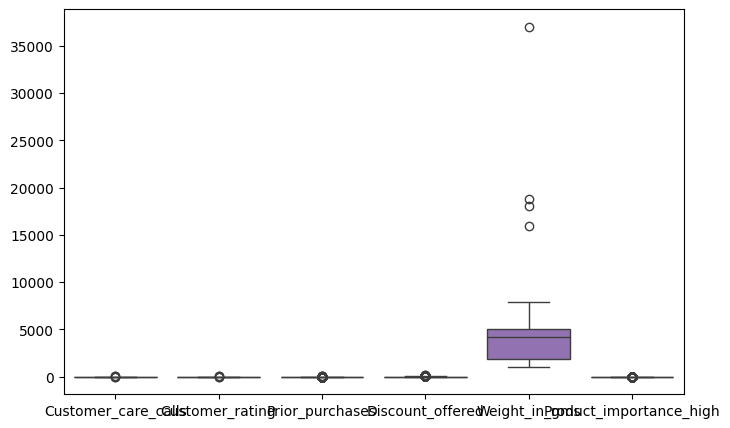

In [ ]:
sns.boxplot(deep_copy_significant_data)

In [ ]:
# perfroming logistic regression again with new data with outliers.
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(deep_copy_significant_data, y, test_size=.3, random_state=1)
X_train_new.head()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_high
4177,4.0,5.0,3.0,9.0,4953.0,0.0
1616,3.0,4.0,3.0,63.0,1611.0,0.0
2775,4.0,1.0,3.0,19.0,1906.0,0.0
10272,4.0,4.0,3.0,5.0,4440.0,0.0
6836,4.0,3.0,3.0,1.0,5214.0,1.0


In [ ]:
lr = LogisticRegression(C=1e9)
LRm_new = lr.fit(X_train_new, y_train_new)
LRm_new.predict_proba(X_test_new)

array([[0.68359496, 0.31640504],
       [0.01378277, 0.98621723],
       [0.56766316, 0.43233684],
       ...,
       [0.36462765, 0.63537235],
       [0.6124586 , 0.3875414 ],
       [0.59738613, 0.40261387]])

In [ ]:
y_pred_new = LRm_new.predict(X_test_new)
print(y_pred_new)
print("Accuracy of the model is:", accuracy_score(y_test_new, y_pred_new))
print("Confusion Matrix:")
confusion_matrix(y_test_new, y_pred_new)

[0 1 0 ... 1 0 0]
Accuracy of the model is: 0.6263636363636363
Confusion Matrix:


array([[ 755,  587],
       [ 646, 1312]])

The Accuracy of the model has decreased by ~1%
 from 63.5 to 62.6 and confusion matrix indicates the varaiation between true positives, false positives, true negatives, false negatives.

**Q12: Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**



In [ ]:
#Remove 1% of data
#Remove 5% of data
#Remove 10% of data
missing_mask_1 = np.random.choice([1, 0], data.shape, p=[0.01, 0.99])
missing_mask_5 = np.random.choice([1, 0], data.shape, p=[0.05, 0.95])
missing_mask_10 = np.random.choice([1, 0], data.shape, p=[0.10, 0.90])

data_with_missing_1 = np.where(missing_mask_1, np.nan, data)
data_with_missing_5 = np.where(missing_mask_5, np.nan, data)
data_with_missing_10 = np.where(missing_mask_10, np.nan, data)


Now we impute the missing data using mean, median and most_frequent element in each column

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp_mean = SimpleImputer(strategy='mean')
imp_median = SimpleImputer(strategy='median')
imp_frequent = SimpleImputer(strategy='most_frequent')

imputed_data_with_mean = pd.DataFrame(imp_mean.fit_transform(data_with_missing_1))
imputed_data_with_median = pd.DataFrame(imp_median.fit_transform(data_with_missing_5))
imputed_data_with_frequent = pd.DataFrame(imp_frequent.fit_transform(data_with_missing_10))

calculating the mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae_mean = mean_absolute_error(data, imputed_data_with_mean)
print("Mean absolute error when imputed with mean:", mae_mean)
mae_median = mean_absolute_error(data, imputed_data_with_median)
print("Mean absolute error when imputed with median:", mae_median)
mae_frequent = mean_absolute_error(data, imputed_data_with_frequent)
print("Mean absolute error when imputed with most frequent number in a column:", mae_frequent)


Mean absolute error when imputed with mean: 0.7481265274169766
Mean absolute error when imputed with median: 3.6684925902354757
Mean absolute error when imputed with most frequent number in a column: 8.476602418401672


**Q6: Do the training and test sets have the same data?**

Below are plots showing test and training data. We can conclude they have different data.

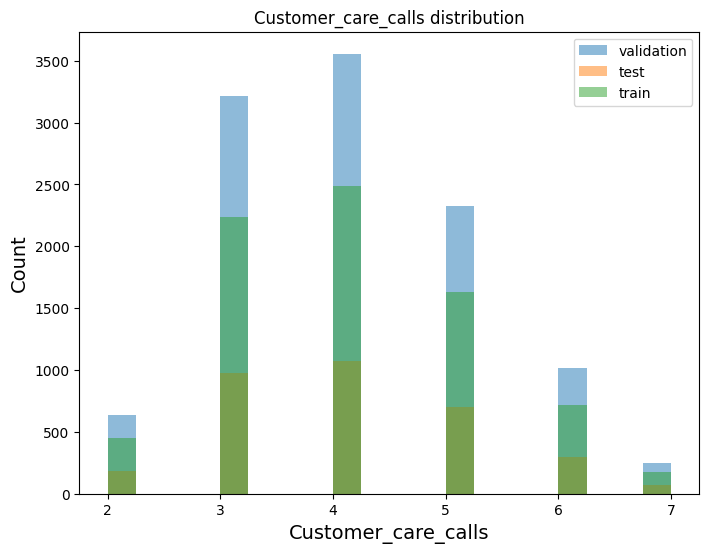

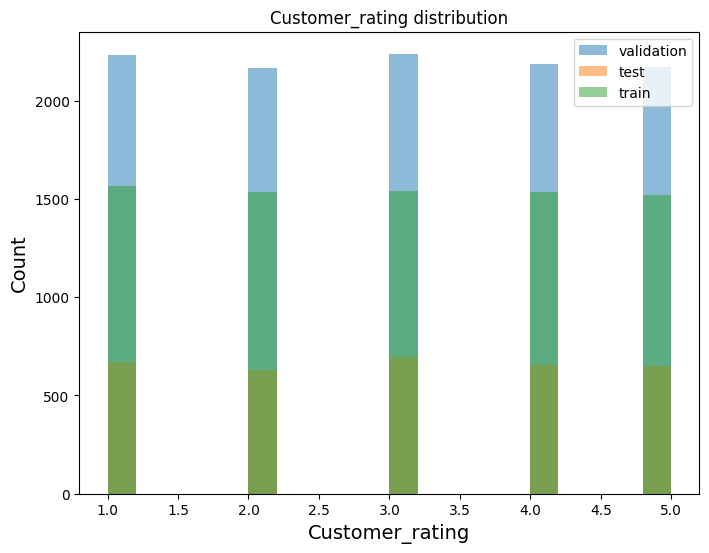

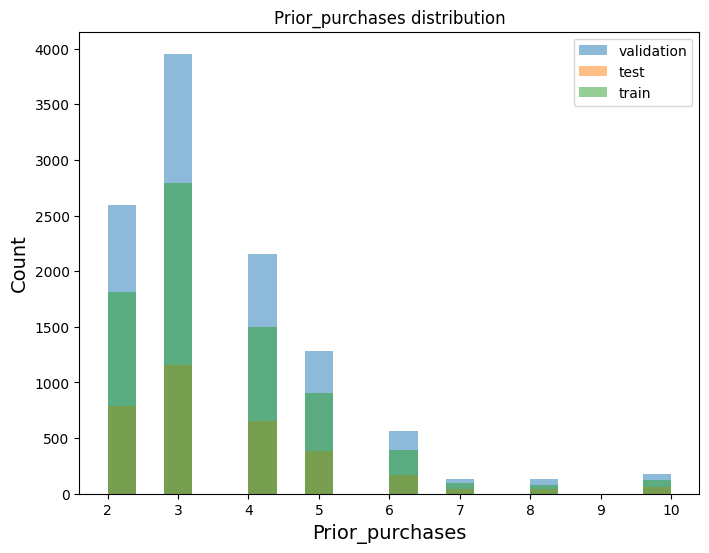

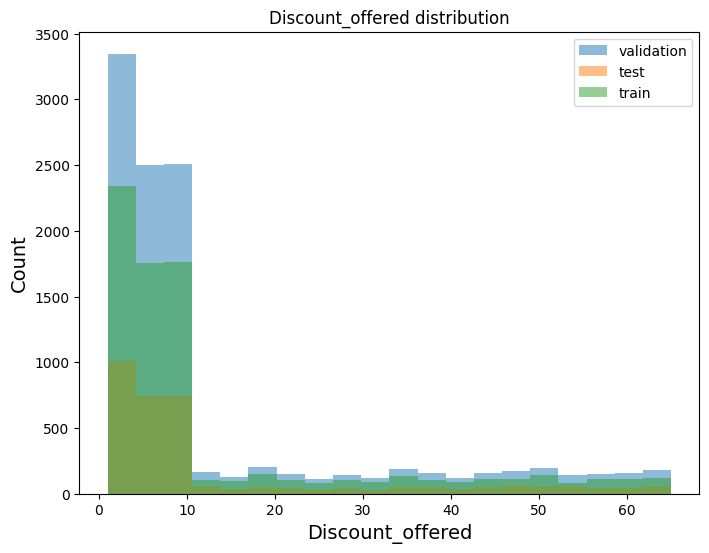

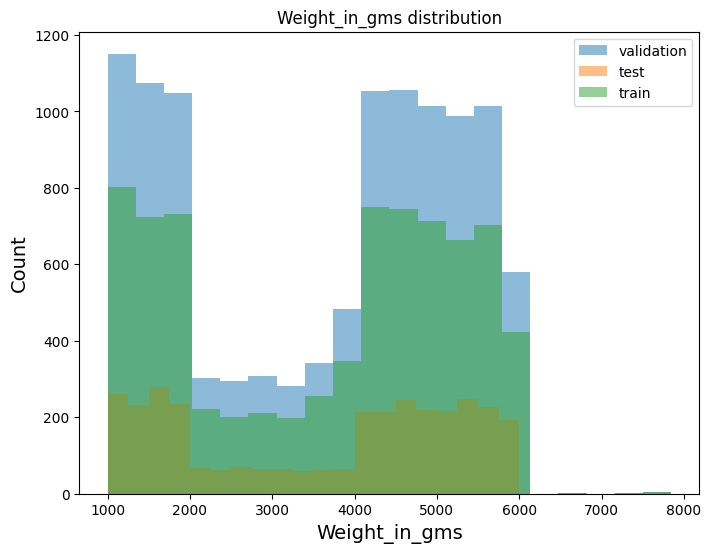

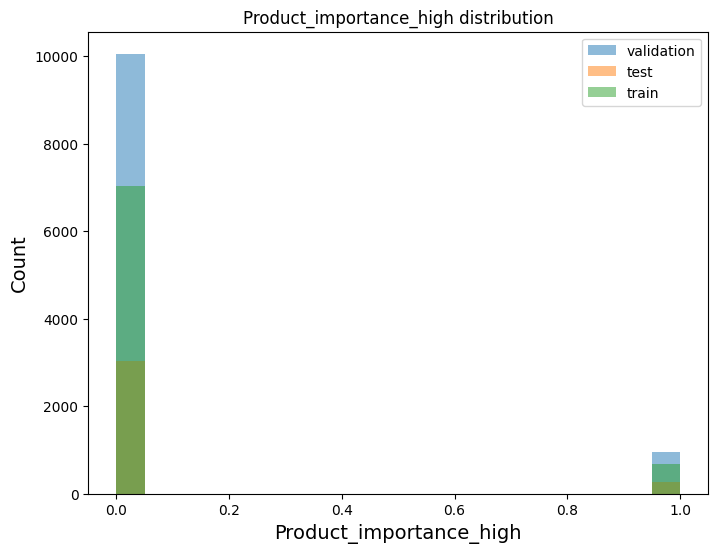

In [ ]:
for col in data_significant:
  plt.figure(figsize=(8,6))
  plt.hist(data_significant[col], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test[col], bins=20, alpha=0.5, label="test")
  plt.hist(X_train[col], bins=20, alpha=0.5, label="train")
  plt.xlabel(col, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc="upper right")
  plt.title("{} distribution".format(col))
  plt.show()

**Q8: Which predictor variables are the most important?**

From permutation Importance weights below we can see the most important predictor variables.


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

permutate = PermutationImportance(LRm, random_state=1).fit(X_test, y_test)
eli5.show_weights(permutate, feature_names=X_test.columns.tolist())

Weight,Feature
0.0679 ± 0.0198,Discount_offered
0.0208 ± 0.0112,Weight_in_gms
0.0057 ± 0.0050,Customer_rating
0.0021 ± 0.0010,Prior_purchases
0.0011 ± 0.0005,Product_importance_high
-0.0010 ± 0.0075,Customer_care_calls


# Conclusion
We have predicted the target variable "Reached On Time" with 64% accuracy using Logistic Regression

# Reference

1.Scikit learn official documentation

2.Dataset from kaggle by PRACHI GOPALANI

3.Eli5 official documentation

4.Code Reference from [Logistic Regression](https://https://colab.research.google.com/drive/1L8rzFrZ_5yZD3HhJLNLRcpaXQMA-3Q35?usp=sharing#scrollTo=-jAw2YKcaMS4) colab notebook.


# License

MIT License

Copyright (c) 2019 Wok

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.